**4-Layered-Neural-Network**

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5439 - loss: 0.9041 - val_accuracy: 0.6979 - val_loss: 0.6183
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7261 - loss: 0.6190 - val_accuracy: 0.7396 - val_loss: 0.5832
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7474 - loss: 0.5708 - val_accuracy: 0.7333 - val_loss: 0.5734
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.5634 - val_accuracy: 0.7396 - val_loss: 0.5520
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7598 - loss: 0.5392 - val_accuracy: 0.7583 - val_loss: 0.5395
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.5310 - val_accuracy: 0.7646 - val_loss: 0.5287
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - loss: 0.5391 - val_accuracy: 0.7625 - val_loss: 0.5193
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.5273 - val_accuracy: 0.7563 - val_loss

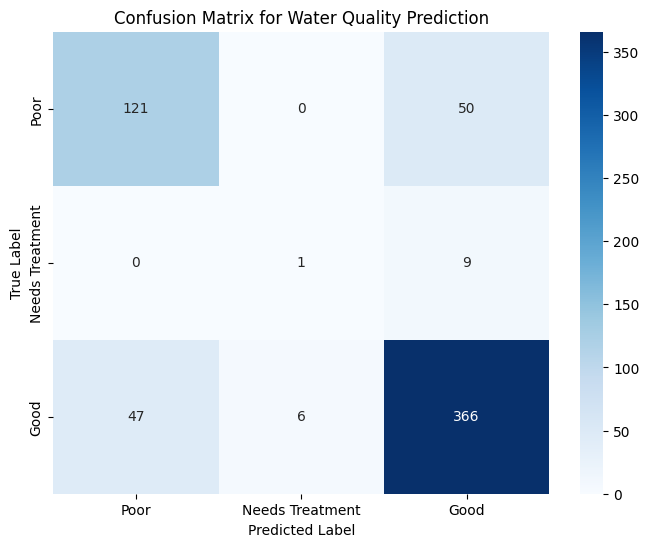


Drinking Water Prediction Accuracy: 0.81
Model saved successfully!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# Load the dataset
file_path = "C:/Users/KIIT/Desktop/AqualQ/src/data/generated_water_quality_data_with_dates.csv"
df = pd.read_csv(file_path)

# Encode target variables
water_quality_mapping = {'Good': 2, 'Needs Treatment': 1, 'Poor': 0}
df['Water Quality'] = df['Water Quality'].map(water_quality_mapping)

# Features and target
X = df.drop(columns=['Water Quality', 'Drinking Water', 'Date'])
y = df['Water Quality']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for frontend usage
dump(scaler, 'C:/Users/KIIT/Desktop/AqualQ/src/SavedModels/scaler.pkl')

# Convert targets to one-hot encoding for multi-class classification
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

# Build the 4-layer neural network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output Layer (3 classes)
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=50, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict Water Quality
y_pred_quality_onehot = model.predict(X_test)
y_pred_quality = np.argmax(y_pred_quality_onehot, axis=1)

# Derive Drinking Water predictions
def derive_drinking_water(quality_pred):
    return ['Yes' if q == 2 else 'No' for q in quality_pred]

y_pred_drinking = derive_drinking_water(y_pred_quality)
actual_drinking_water = derive_drinking_water(y_test)

# Classification Report for Water Quality
print("/nWater Quality Classification Report:")
print(classification_report(y_test, y_pred_quality, target_names=['Poor', 'Needs Treatment', 'Good']))

# Confusion Matrix for Water Quality
conf_matrix = confusion_matrix(y_test, y_pred_quality)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Needs Treatment', 'Good'],
            yticklabels=['Poor', 'Needs Treatment', 'Good'])
plt.title("Confusion Matrix for Water Quality Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Accuracy for Drinking Water Prediction
drinking_water_accuracy = np.mean(np.array(actual_drinking_water) == np.array(y_pred_drinking))
print(f"/nDrinking Water Prediction Accuracy: {drinking_water_accuracy:.2f}")

# Save the model
model.save('C:/Users/KIIT/Desktop/AqualQ/src/SavedModels/water_quality_model.h5')
print("Model saved successfully!")
